# 0. Introdução

A análise foi realizada utilizando duas bases de uma empresa de viagens que está tentando saber quais clientes estão mais propícios a comprar o seguro de vida durante a viagem e as bases foram retiradas do www.kaggle.com.

A motivação da análise é entender quais fatores podem influenciar a aquisição do seguro de vida (nossa variável target). Sabendo isso, a empresa pode direcionar ações para as pessoas que não tem a tendência a adquirir para poder convencer elas a comprar esse seguro e aumentar o lucro da empresa.

Algumas perguntas que tentaremos responder:
* Quais as idades mais predominantes?
* Quais os setores que possuem mais (menos) clientes empregados?
* A quantidade de clientes que sofrem de algum tipo de doença de maior gravidade?
* A quantidade de viajantes frequentes?
* A quantidade de viajantes para fora do país?
* Quantos membros da familia cada cliente possui? Isso impacta na renda do cliente?
* Existe relação entre a escolaridade e a renda do cliente?
* Existe relação entre viajar para fora do país e renda do cliente? E com relação a escolaridade?
* Relações das variáveis com a variável target?

# 1. Importação das bibliotecas

In [404]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

# 2. Carregando a base

In [405]:
train_df = pd.read_csv('Travel Company Old Clients.csv', sep=';')
test_df =  pd.read_csv('Travel Company New Clients.csv', sep=';')

In [406]:
# Alterando o nome das colunas
train_df.columns = ['age', 'employment_type', 'graduate_or_not', 'annual_income',
                    'family_members', 'chronic_diseases', 'frequent_flyer', 
                    'ever_travelled_abroad', 'travel_insurance']

test_df.columns = ['age', 'employment_type', 'graduate_or_not', 'annual_income',
                    'family_members', 'chronic_diseases', 'frequent_flyer', 
                    'ever_travelled_abroad']

In [407]:
# Verificando os primeiros registros da base de treino
train_df.head()

,age,employment_type,graduate_or_not,annual_income,family_members,chronic_diseases,frequent_flyer,ever_travelled_abroad,travel_insurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [408]:
# Verificando os primeiros registros da base de teste
test_df.head()

,age,employment_type,graduate_or_not,annual_income,family_members,chronic_diseases,frequent_flyer,ever_travelled_abroad
0,25,Private Sector/Self Employed,No,1150000,4,0,No,No
1,34,Private Sector/Self Employed,Yes,1500000,4,1,Yes,Yes
2,33,Private Sector/Self Employed,Yes,1500000,3,0,Yes,Yes
3,28,Private Sector/Self Employed,Yes,1150000,3,0,No,No
4,33,Government Sector,Yes,400000,5,1,No,No


# 3. Fazendo a análise da base

In [409]:
# Checando o total de linhas e colunas da base de treino
print(f'A base de treino possui um total de {train_df.shape[0]} linhas e {train_df.shape[1]} colunas')

A base de treino possui um total de 682 linhas e 9 colunas


In [410]:
# Checando o total de linhas e colunas da base de teste
print(f'A base de teste possui um total de {test_df.shape[0]} linhas e {test_df.shape[1]} colunas')

A base de teste possui um total de 1303 linhas e 8 colunas


In [411]:
# Verificando informações das variáveis da base de treino
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    682 non-null    int64 
 1   employment_type        682 non-null    object
 2   graduate_or_not        682 non-null    object
 3   annual_income          682 non-null    int64 
 4   family_members         682 non-null    int64 
 5   chronic_diseases       682 non-null    int64 
 6   frequent_flyer         682 non-null    object
 7   ever_travelled_abroad  682 non-null    object
 8   travel_insurance       682 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 48.1+ KB


In [412]:
# Verificando informações das variáveis da base de teste
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    1303 non-null   int64 
 1   employment_type        1303 non-null   object
 2   graduate_or_not        1303 non-null   object
 3   annual_income          1303 non-null   int64 
 4   family_members         1303 non-null   int64 
 5   chronic_diseases       1303 non-null   int64 
 6   frequent_flyer         1303 non-null   object
 7   ever_travelled_abroad  1303 non-null   object
dtypes: int64(4), object(4)
memory usage: 81.6+ KB


In [413]:
# Verificando se existe algum valor nulo na base de treino
train_df.isna().sum()

age                      0
employment_type          0
graduate_or_not          0
annual_income            0
family_members           0
chronic_diseases         0
frequent_flyer           0
ever_travelled_abroad    0
travel_insurance         0
dtype: int64

In [414]:
# Verificando se existe algum valor nulo na base de teste
test_df.isna().sum()

age                      0
employment_type          0
graduate_or_not          0
annual_income            0
family_members           0
chronic_diseases         0
frequent_flyer           0
ever_travelled_abroad    0
dtype: int64

In [415]:
# Verificando se existe dados duplicados na base de treino
print(f'Existe {train_df.duplicated().sum()} linhas duplicadas')

Existe 113 linhas duplicadas


In [416]:
# Excluindo as linhas duplicadas
train_df.drop_duplicates(keep='first', inplace=True)

In [417]:
# Análise estatistica da base de treino
train_df.describe()

,age,annual_income,family_members,chronic_diseases,travel_insurance
count,569.000000,5.690000e+02,569.000000,569.000000,569.000000
mean,29.627417,9.551845e+05,4.912127,0.305800,0.355009
std,2.887873,3.637326e+05,1.702115,0.461151,0.478937
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.500000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.500000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [418]:
# Análise estatistica da base de teste
test_df.describe()

,age,annual_income,family_members,chronic_diseases
count,1303.000000,1.303000e+03,1303.000000,1303.000000
mean,29.659248,9.245971e+05,4.709900,0.276285
std,2.920964,3.795099e+05,1.602691,0.447331
min,25.000000,3.000000e+05,2.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000
50%,29.000000,9.000000e+05,4.000000,0.000000
75%,32.000000,1.200000e+06,6.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000


# 4. Análise univariada

Entendendo a variável target.

Text(0.5, 1.0, 'Análise da variável target')

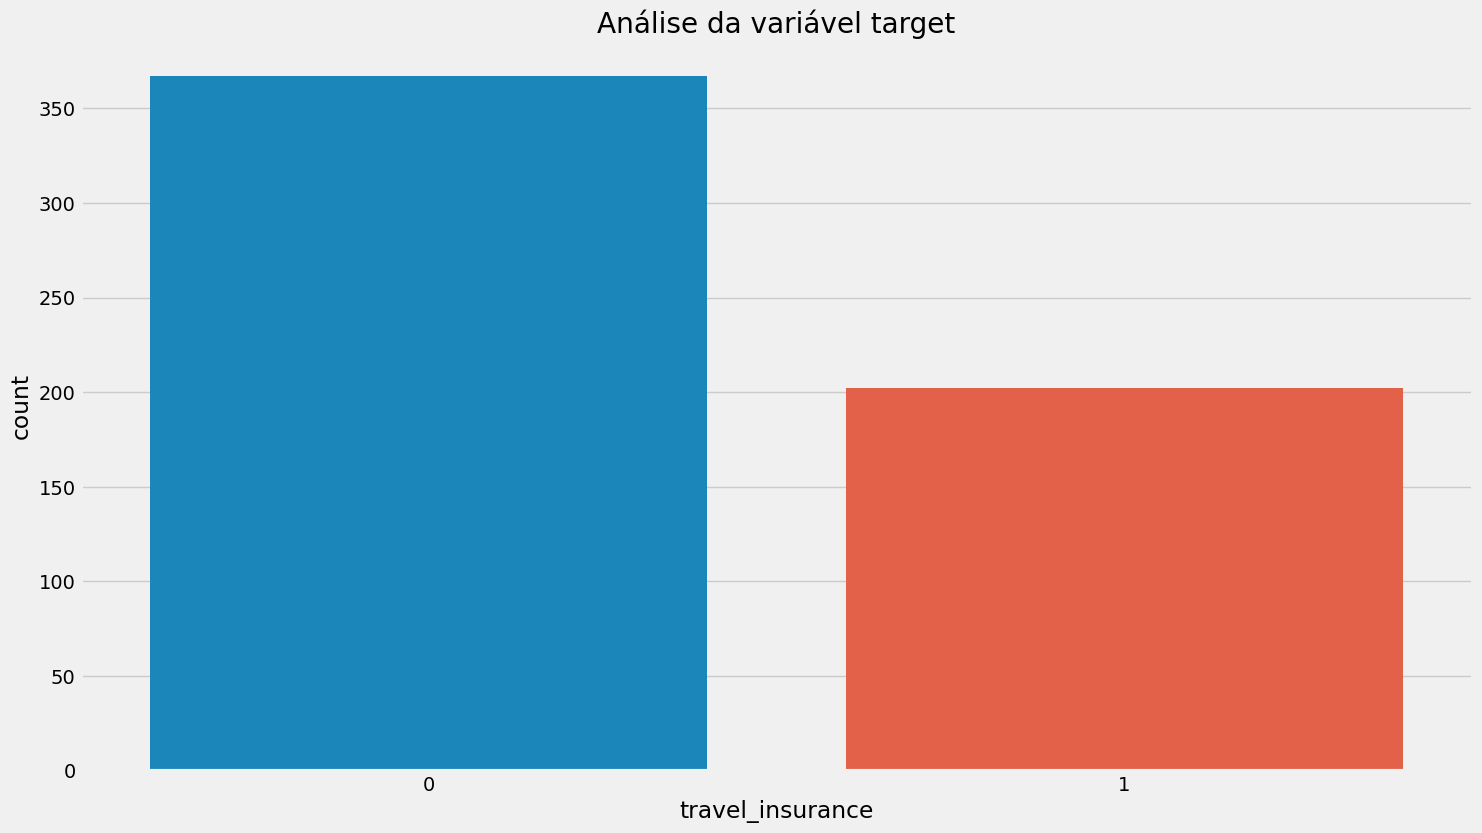

In [419]:
plt.figure(figsize=(16, 9))
sns.countplot(data = train_df, x = 'travel_insurance')
plt.title('Análise da variável target')

Analisando o percentual.

In [420]:
print(f'O % das pessoas que adquirem o seguro de viagem é de {100 * train_df.travel_insurance.mean():.2f}%')

O % das pessoas que adquirem o seguro de viagem é de 35.50%


Analisando as idades que mais aparecem na base.

Text(0.5, 1.0, 'Análise da variável idade')

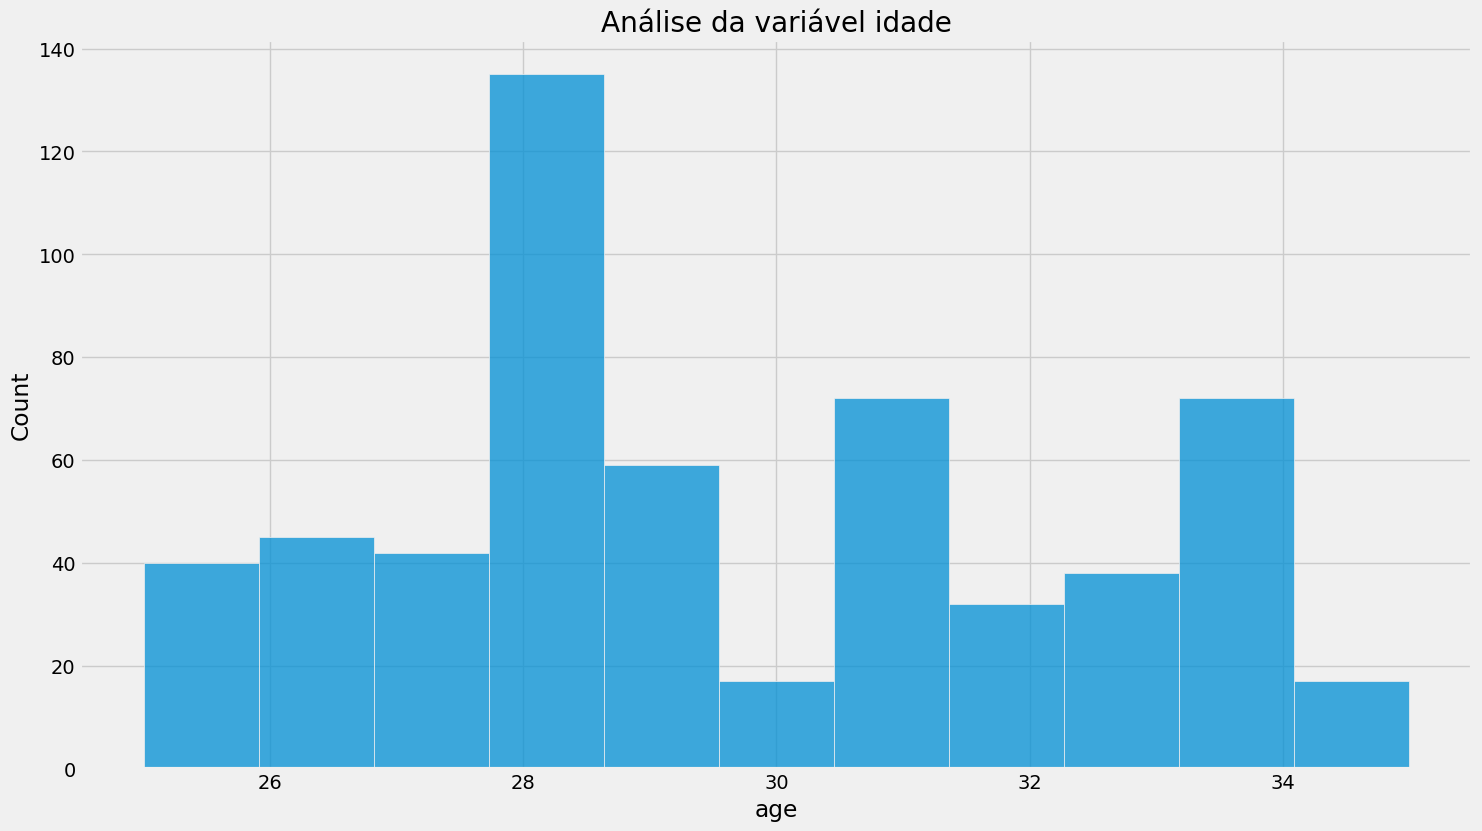

In [421]:
plt.figure(figsize=(16, 9))
sns.histplot(data = train_df, x = 'age')
plt.title('Análise da variável idade')

Colocando o % total de cada idade da base num dataframe, observamos que aproximadamente 1/4 da base é de pessoas que possuem 28 anos.

In [422]:
df_age = train_df['age'].value_counts(1).reset_index()
df_age = pd.DataFrame({'age': df_age['index'], '%': df_age['age']})
df_age

,age,%
0,28,0.237258
1,31,0.126538
2,34,0.126538
3,29,0.103691
4,26,0.079086
5,27,0.073814
6,25,0.070299
7,33,0.066784
8,32,0.056239
9,35,0.029877


Análisando a variável renda

Text(0.5, 1.0, 'Análise da variável renda')

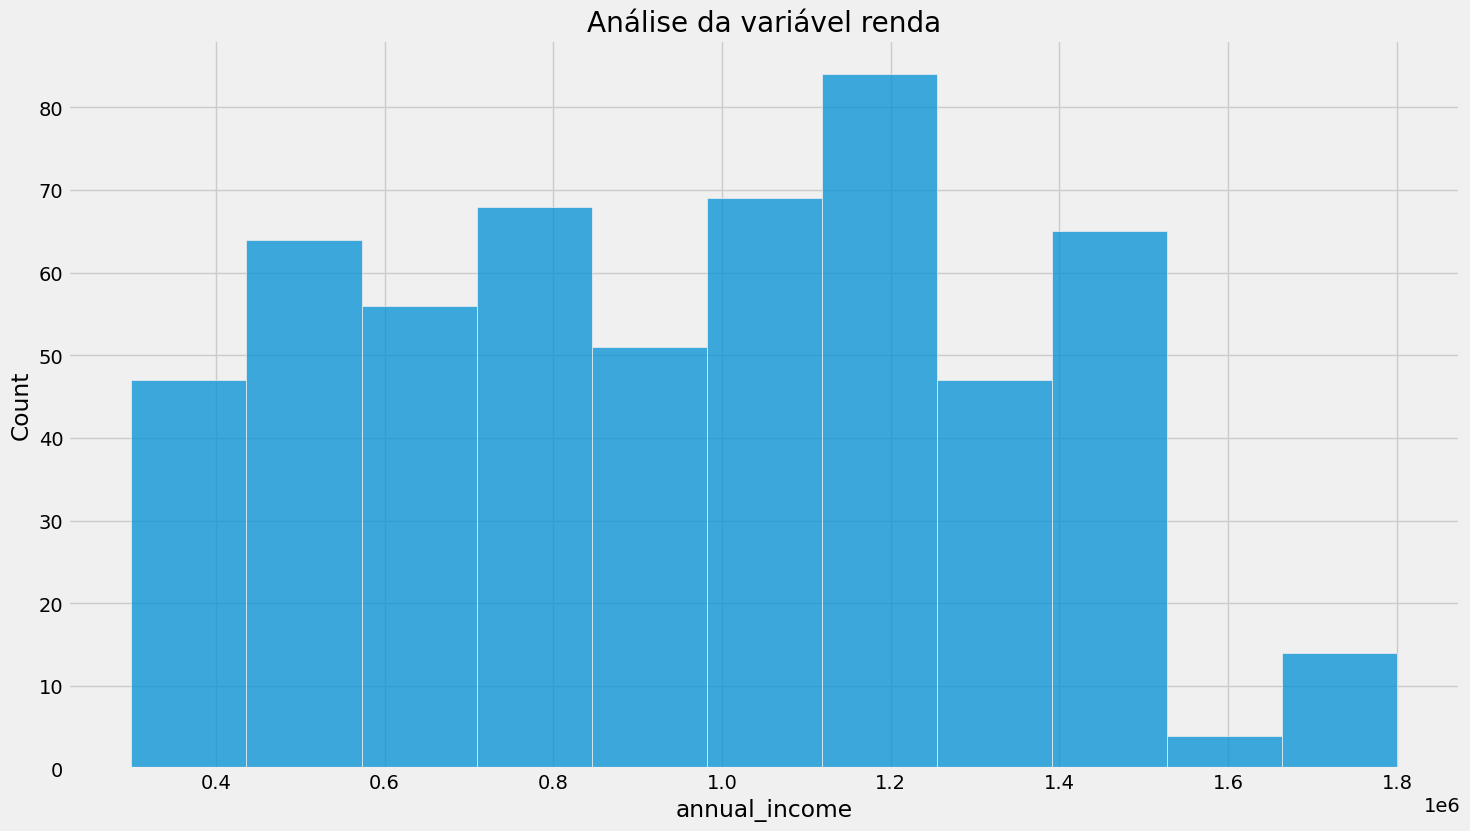

In [423]:
plt.figure(figsize=(16, 9))
sns.histplot(data = train_df, x = 'annual_income')
plt.title('Análise da variável renda')

Analisando o setor que os clientes trabalham.

Text(0.5, 1.0, 'Análise da variável setor do emprego')

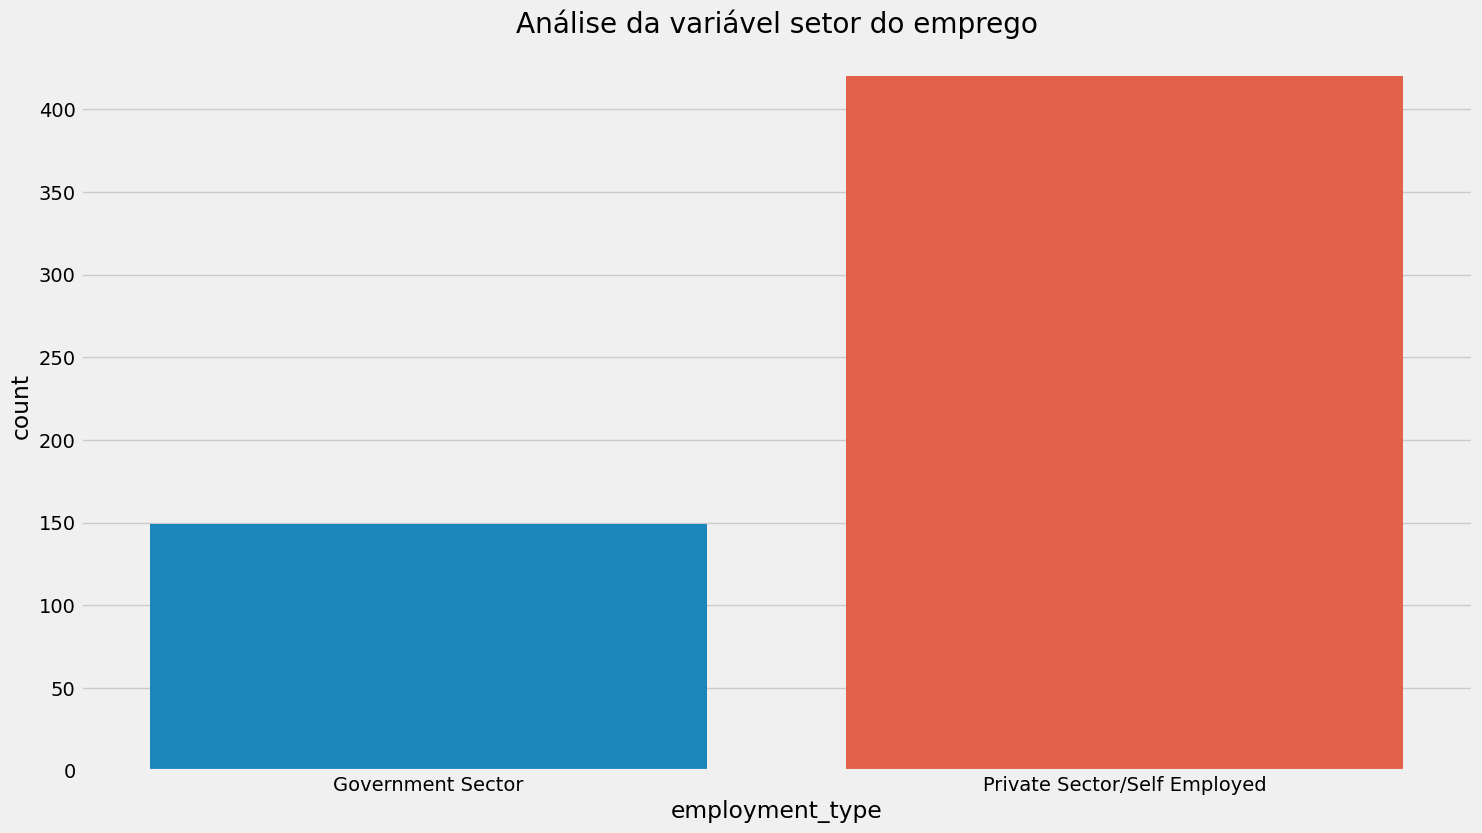

In [424]:
plt.figure(figsize=(16, 9))
sns.countplot(data = train_df, x = 'employment_type')
plt.title('Análise da variável setor do emprego')

Podemos ver que a grande maioria dos clientes trabalhando por contra própria ou no setor privado.

Analisando o número de membros da família do cliente.

Text(0.5, 1.0, 'Análise da variável quantidade de membros da família')

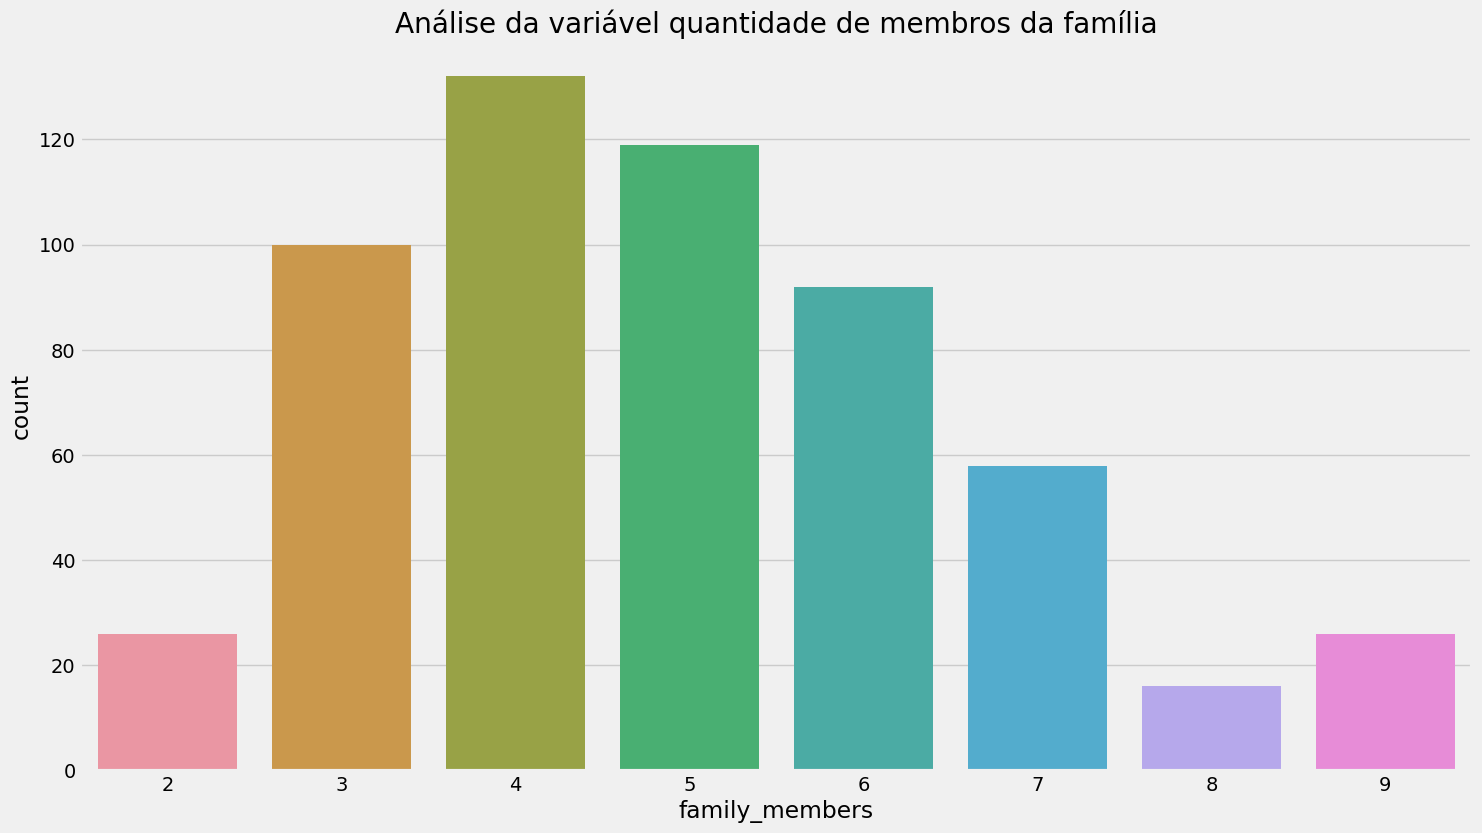

In [425]:
plt.figure(figsize=(16, 9))
sns.countplot(data = train_df, x = 'family_members')
plt.title('Análise da variável quantidade de membros da família')

In [426]:
df_family_members = train_df['family_members'].value_counts(1).reset_index()
df_family_members = pd.DataFrame({'family_members': df_family_members['index'], '%': df_family_members['family_members']})
df_family_members

,family_members,%
0,4,0.231986
1,5,0.209139
2,3,0.175747
3,6,0.161687
4,7,0.101933
5,9,0.045694
6,2,0.045694
7,8,0.028120


Analisando a % de cada total de membros da família dos clientes, podemos ver que quase 1/4 dos clientes possui 4 membros e aproximadamente 1/5 dos clientes possuem 5 membros na família.

Text(0.5, 1.0, 'Análise da variável quantidade de membros da família')

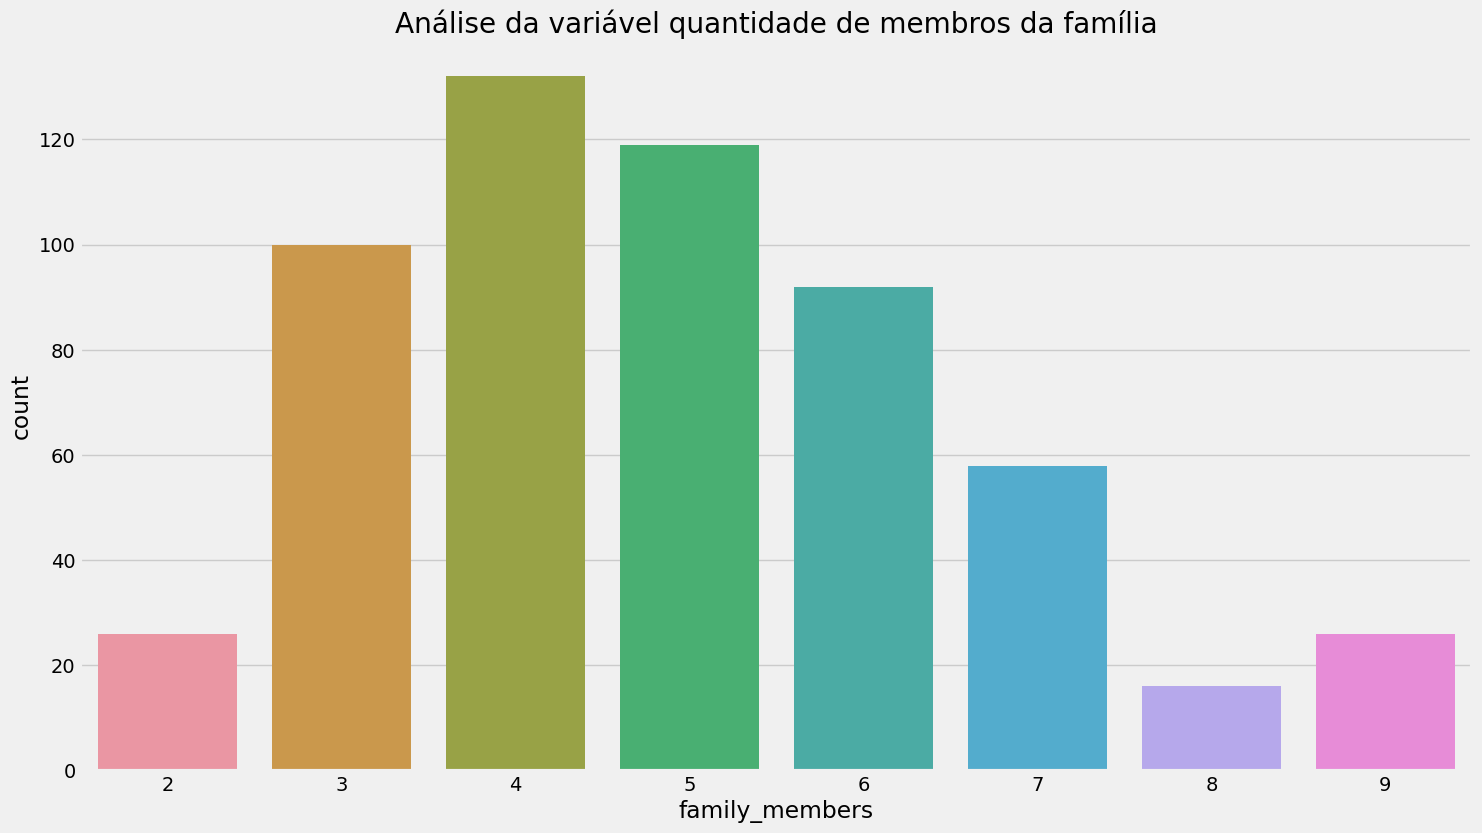

In [427]:
plt.figure(figsize=(16, 9))
sns.countplot(data = train_df, x = 'family_members')
plt.title('Análise da variável quantidade de membros da família')

Analisando se o clientes possuem graduação ou não

Text(0.5, 1.0, 'Análise se o cliente possui graduação ou não')

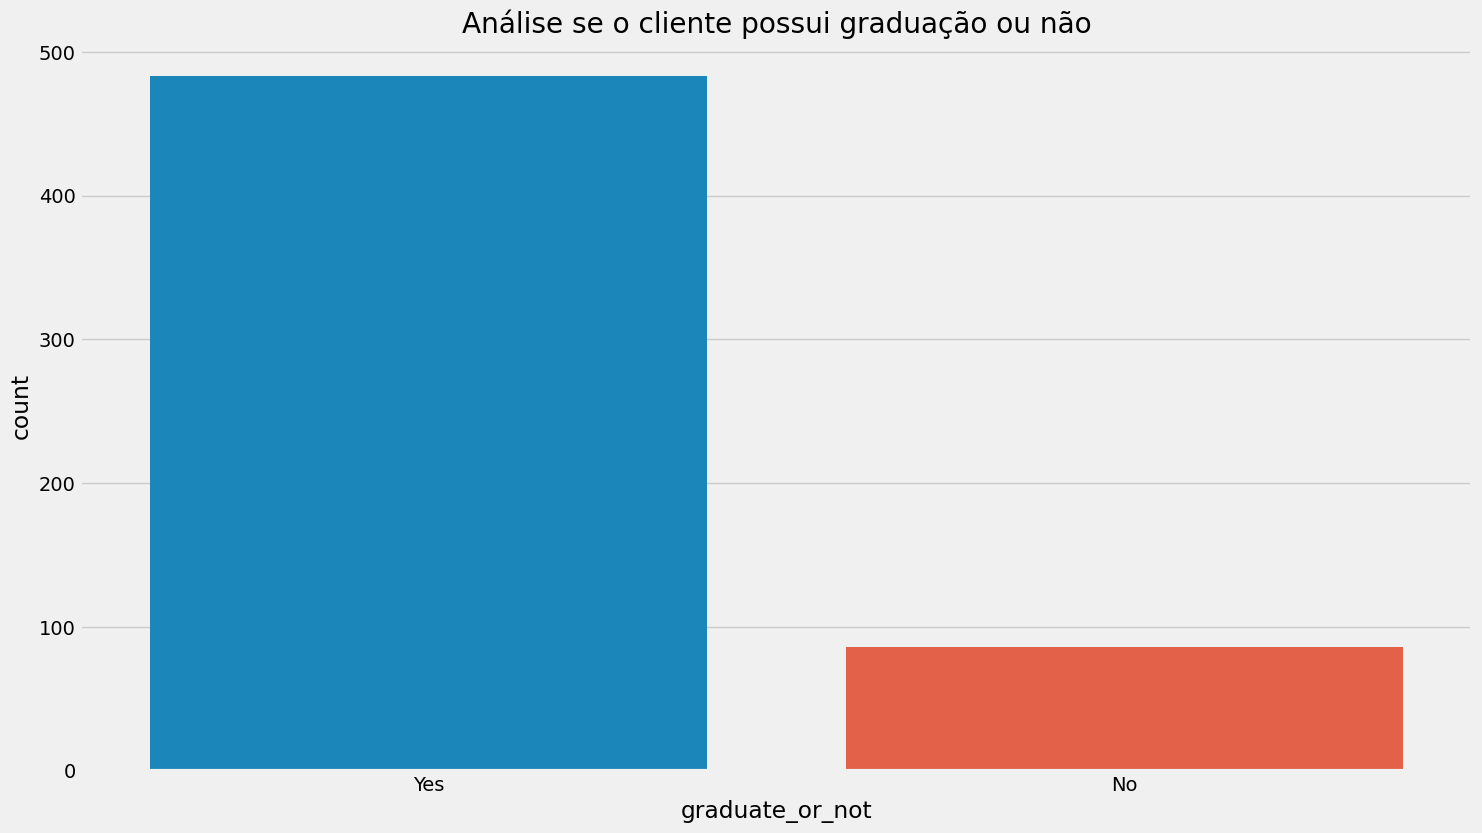

In [428]:
plt.figure(figsize=(16, 9))
sns.countplot(data = train_df, x = 'graduate_or_not')
plt.title('Análise se o cliente possui graduação ou não')

Podemos ver que grande parte dos clientes possuem graduação

Analisando quantos clientes possuem doenças graves.

Text(0.5, 1.0, 'Análise se o cliente possui doenças graves')

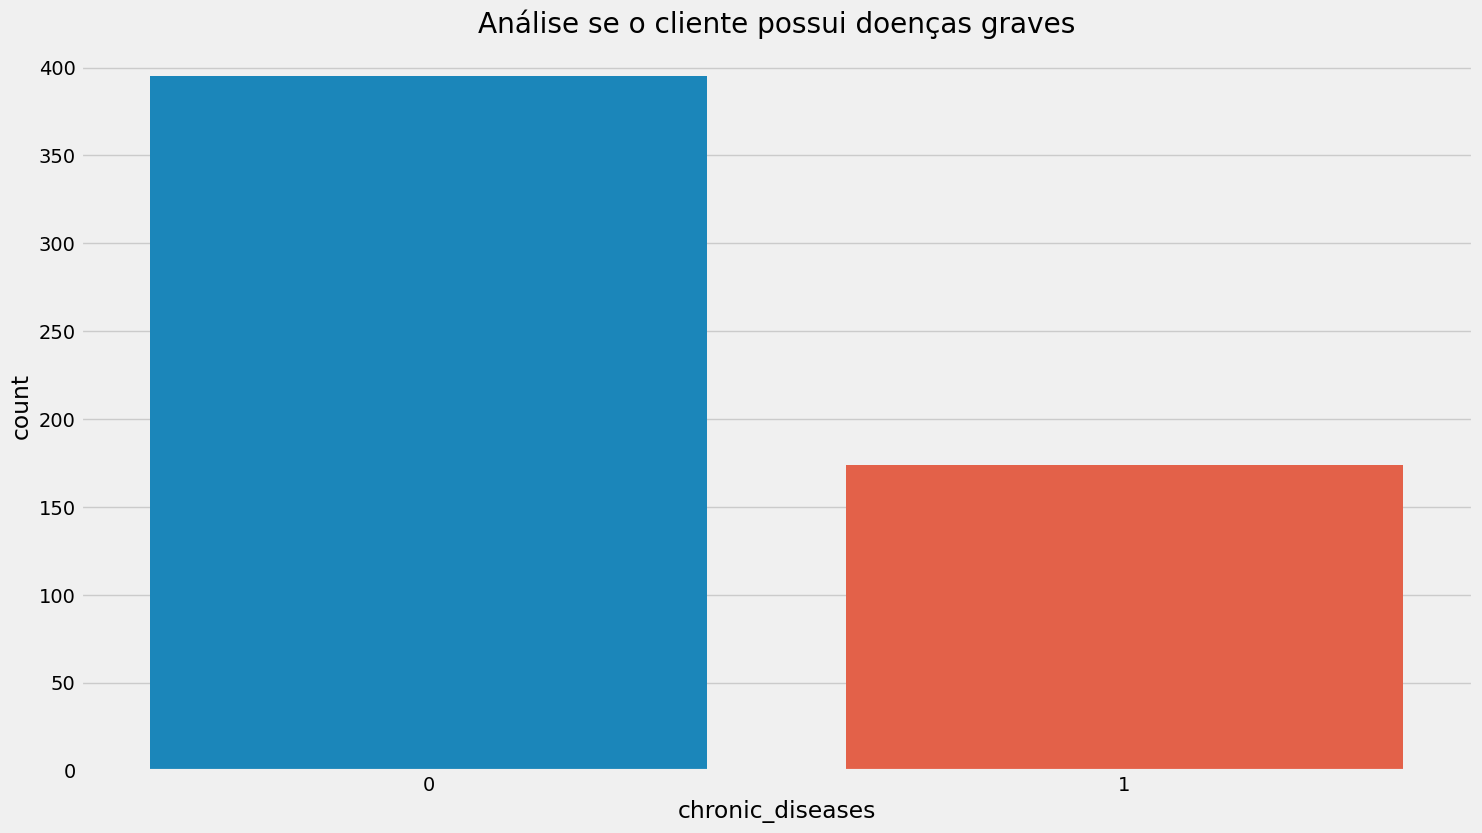

In [429]:
plt.figure(figsize=(16, 9))
sns.countplot(data = train_df, x = 'chronic_diseases')
plt.title('Análise se o cliente possui doenças graves')

Podemos ver que a maioria dos clientes não possui doenças graves.

Analisando a quantidade de clientes que viajam frequentemente.

Text(0.5, 1.0, 'Análise se o cliente viaja frequentemente')

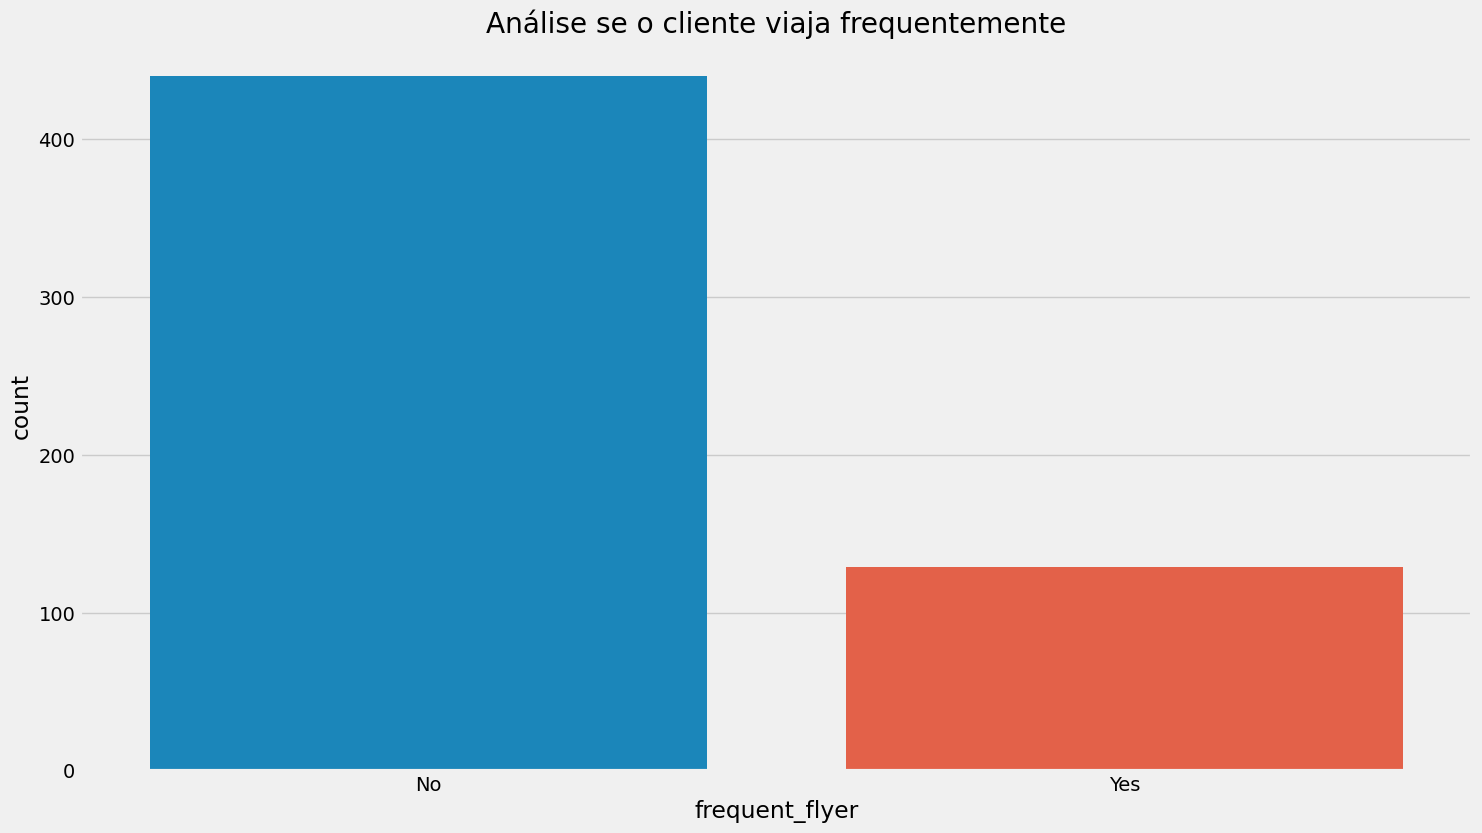

In [430]:
plt.figure(figsize=(16, 9))
sns.countplot(data = train_df, x = 'frequent_flyer')
plt.title('Análise se o cliente viaja frequentemente')

Podemos ver que a maioria dos clientes não são viajantes frequentes.

Analisando a quantidade de clientes que já viajaram para fora do país

Text(0.5, 1.0, 'Análise se o cliente já viajou para fora do país')

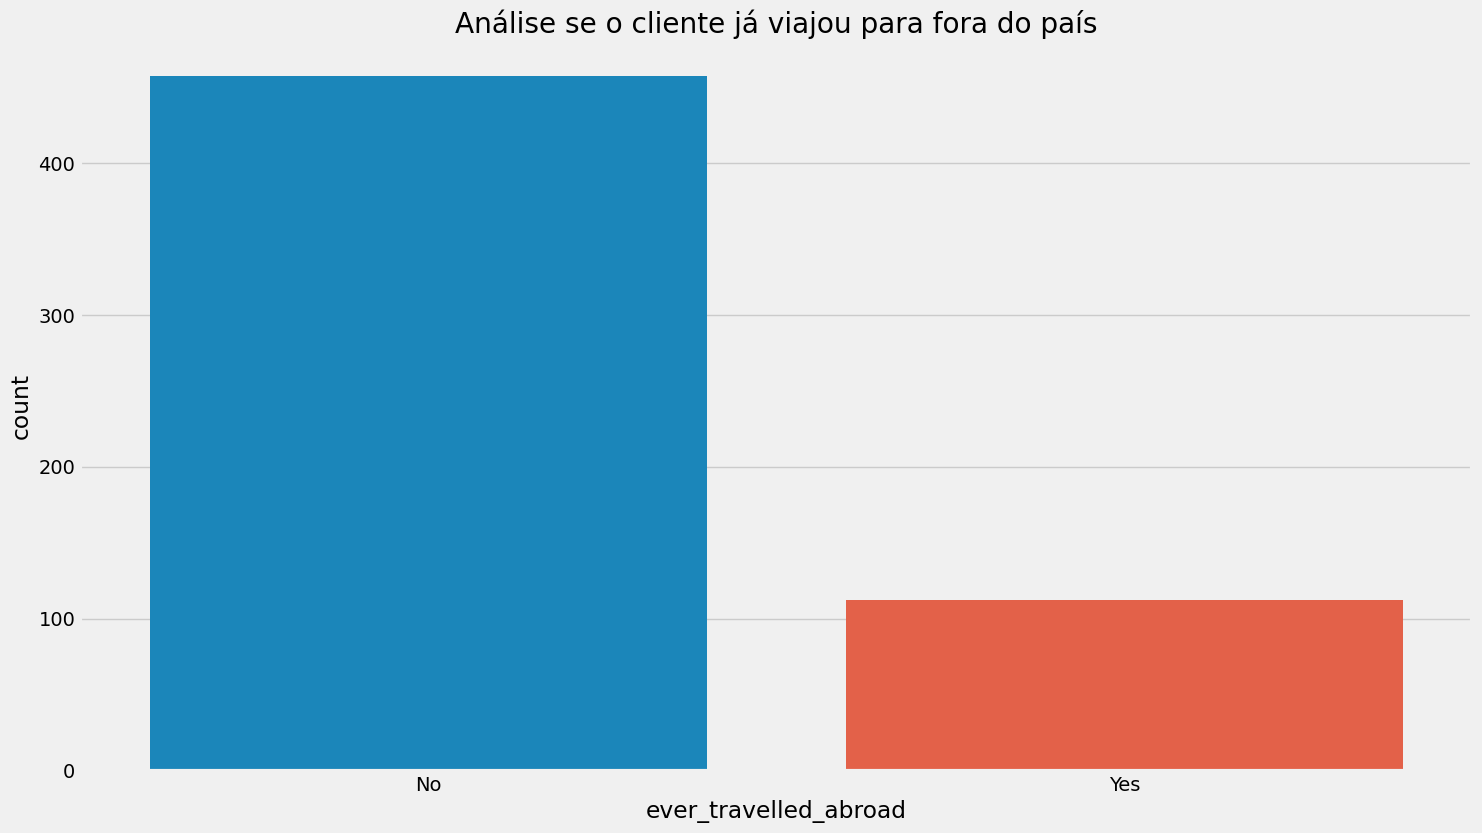

In [431]:
plt.figure(figsize=(16, 9))
sns.countplot(data = train_df, x = 'ever_travelled_abroad')
plt.title('Análise se o cliente já viajou para fora do país')

Podemos ver que a grande maioria dos clientes nunca viajaram para fora do país

# 5. Análise multivariada

**Relações das variáveis agrupadas pela variável target**

Primeiro, podemos tentar identificar o perfil dos clientes com graduação que adquirem o seguro.

Text(0.5, 1.0, 'Proporção de clientes com graduação que adquiriram o seguro')

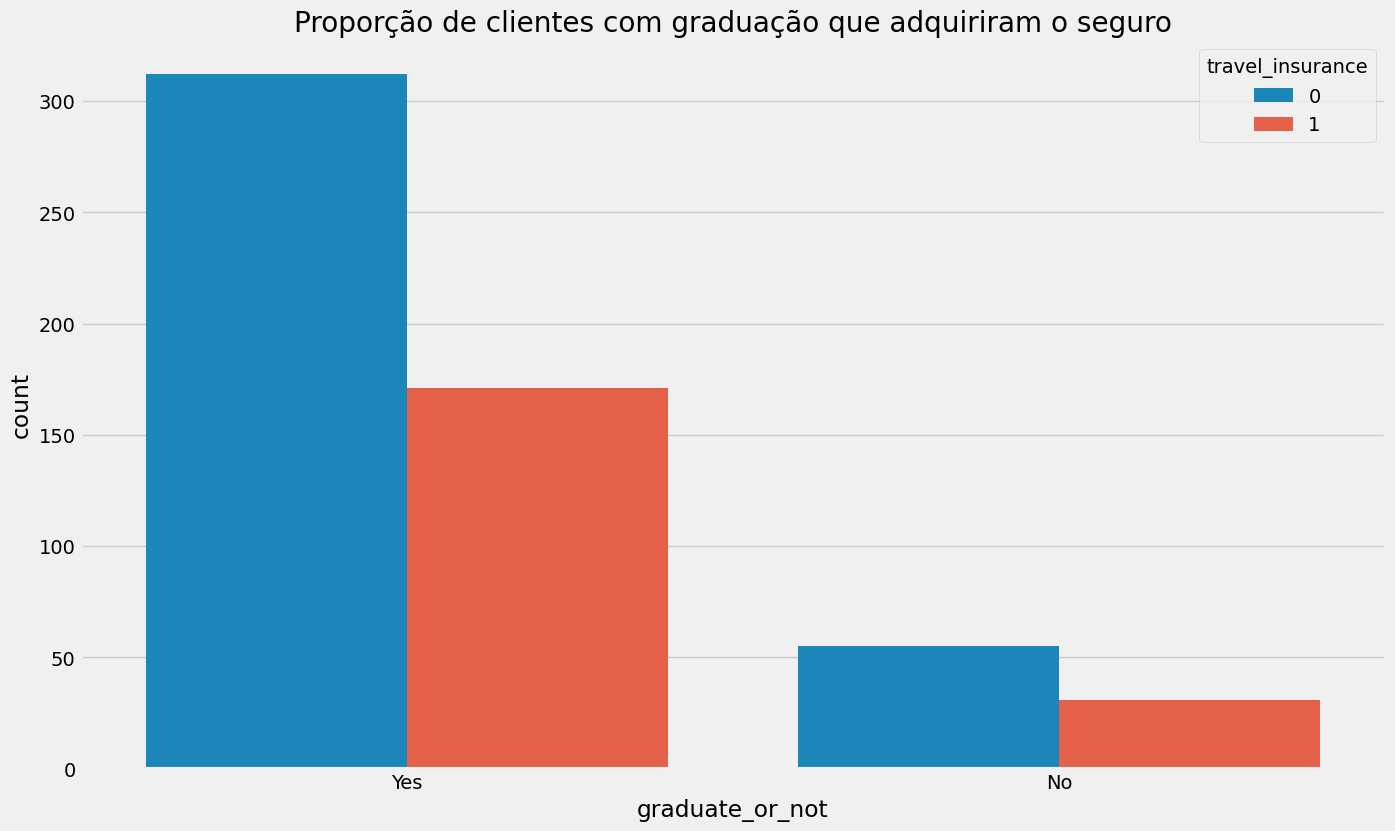

In [432]:
plt.figure(figsize=(15, 9))
sns.countplot(data = train_df, x = 'graduate_or_not', hue = 'travel_insurance')
plt.title('Proporção de clientes com graduação que adquiriram o seguro')

É possível identificar que ter ou não graduação, não parece ter uma grande influência na aquisição do seguro.

Podemos também identificar o perfil dos clientes com doenças graves que adquirem o seguro.

Text(0.5, 1.0, 'Proporção de clientes com doenças graves que adquiriram o seguro')

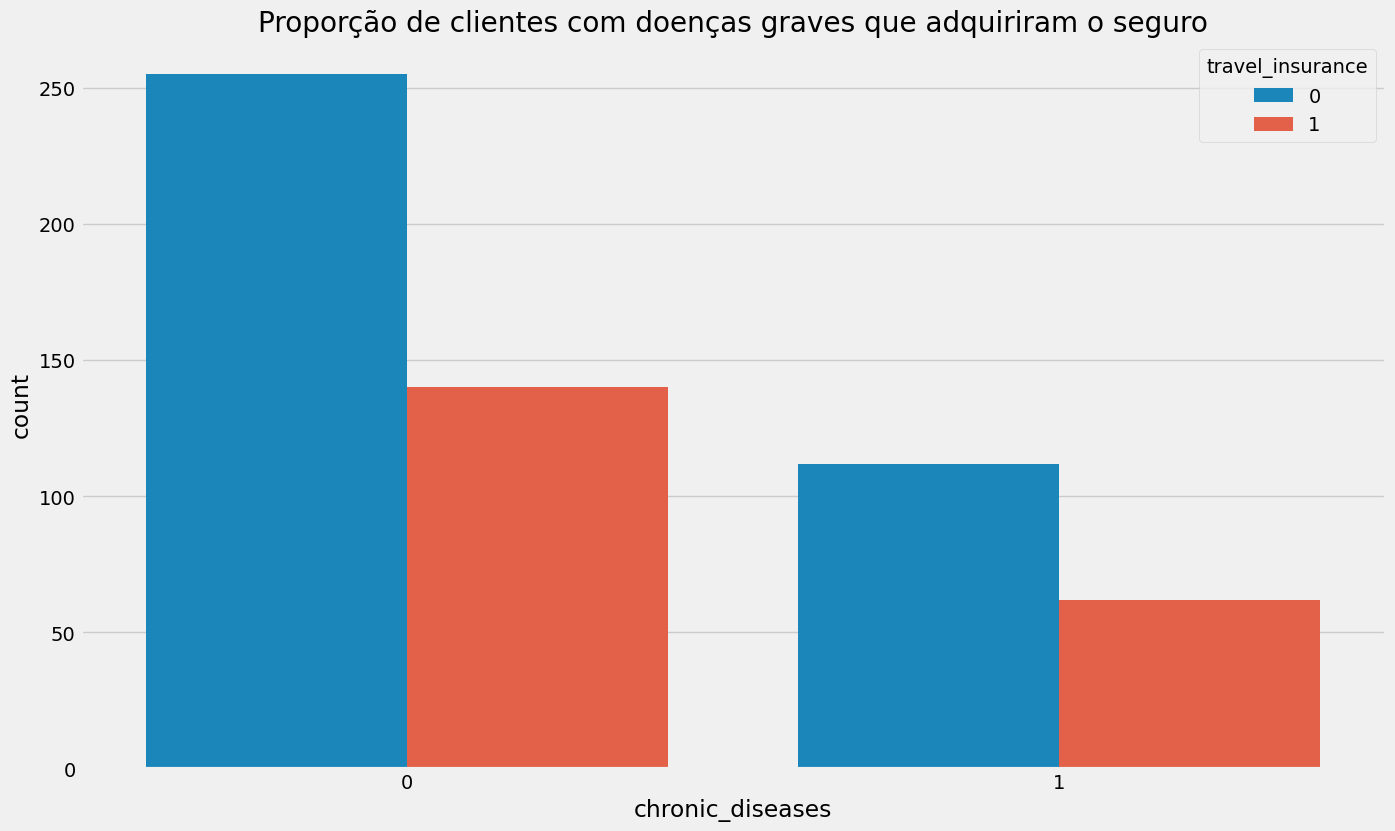

In [433]:
plt.figure(figsize=(15, 9))
sns.countplot(data = train_df, x = 'chronic_diseases', hue = 'travel_insurance')
plt.title('Proporção de clientes com doenças graves que adquiriram o seguro')

É possível identificar que ter ou não doenças graves, não parece ter uma grande influência na aquisição do seguro.

Podemos também identificar o perfil dos clientes que viaja frequentemente que adquirem o seguro.

Text(0.5, 1.0, 'Proporção de clientes que viajam frequentemente que adquiriram o seguro')

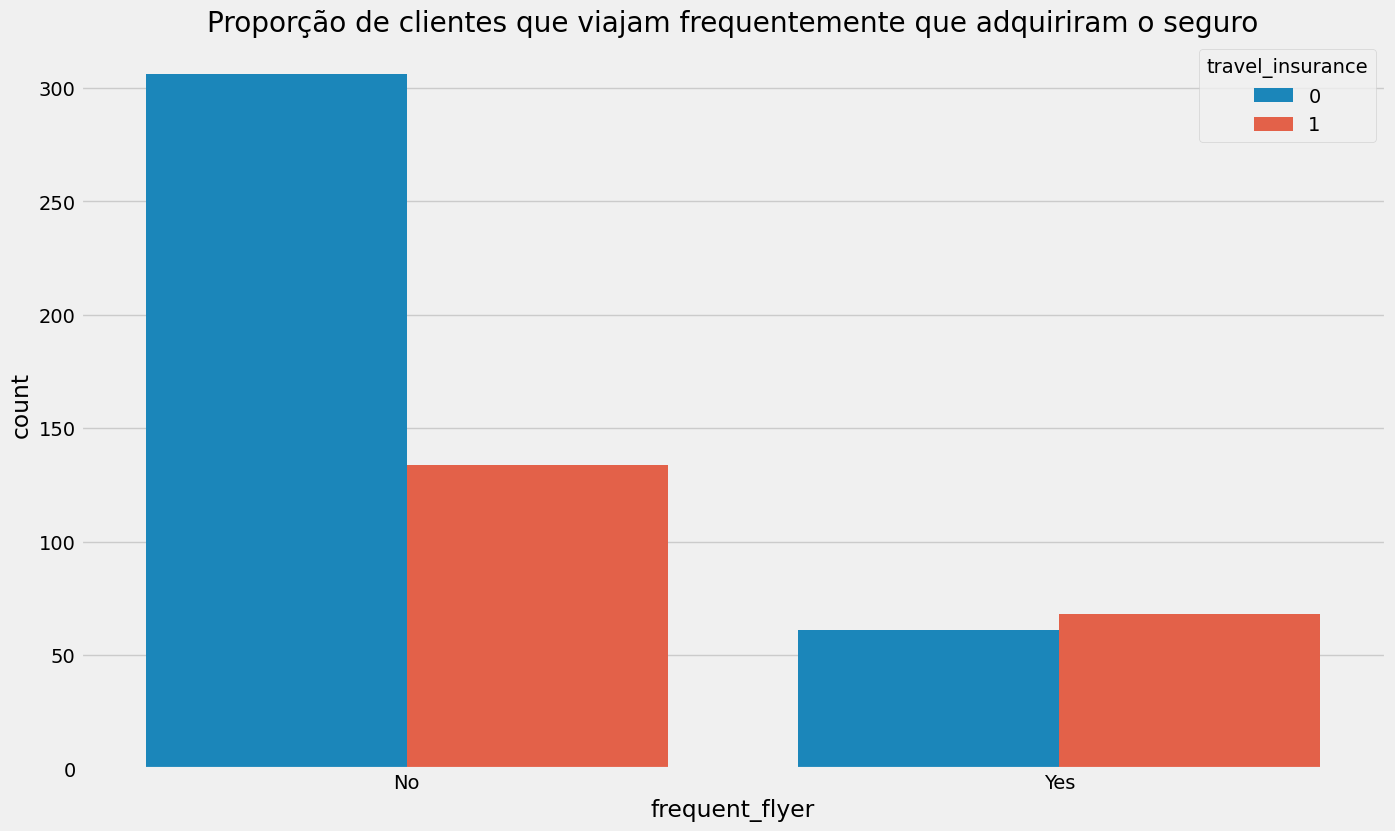

In [434]:
plt.figure(figsize=(15, 9))
sns.countplot(data = train_df, x = 'frequent_flyer', hue = 'travel_insurance')
plt.title('Proporção de clientes que viajam frequentemente que adquiriram o seguro')

É possível identificar que viajar frequentemente implica numa maior chance de adquirir o seguro. Possivelmente essa relação se dá pelo medo de acontecer algum acidente, já que quanto mais você viaja, mais está exposto a essa possibilidade.

Podemos também identificar o perfil dos clientes que viaja para exterior que adquirem o seguro.

Text(0.5, 1.0, 'Proporção de clientes que viajaram para o exterior que adquiriram o seguro')

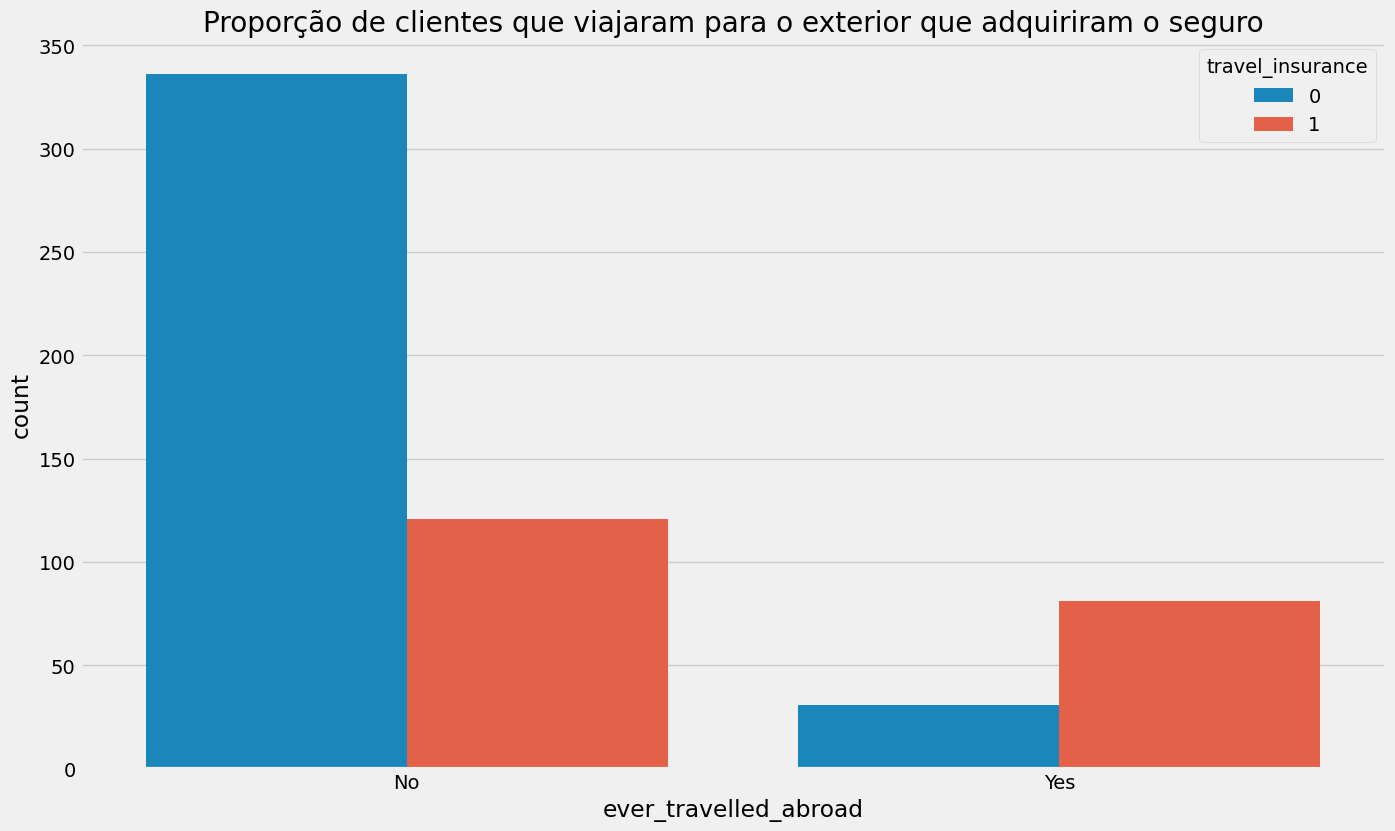

In [435]:
plt.figure(figsize=(15, 9))
sns.countplot(data = train_df, x = 'ever_travelled_abroad', hue = 'travel_insurance')
plt.title('Proporção de clientes que viajaram para o exterior que adquiriram o seguro')

É possível identificar que viajar para o exterior implica numa maior chance de adquirir o seguro. Possivelmente essa relação se dá pelo medo de acontecer algum acidente pela distância que vai ser percorrida.

Podemos também identificar o perfil dos clientes pelo setor que trabalha que adquirem o seguro.

Text(0.5, 1.0, 'Proporção de clientes por tipo de emprego que adquiriram o seguro')

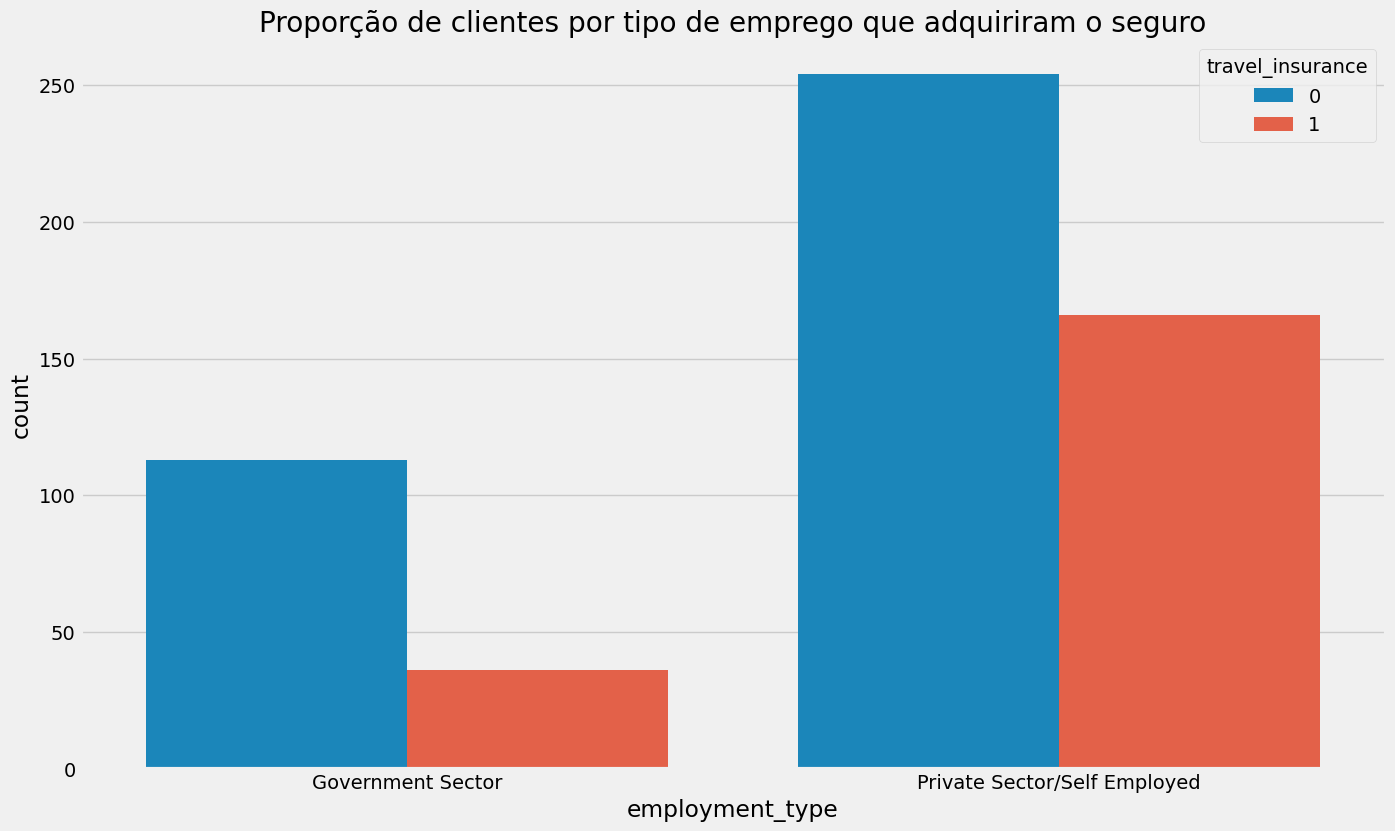

In [436]:
plt.figure(figsize=(15, 9))
sns.countplot(data = train_df, x = 'employment_type', hue = 'travel_insurance')
plt.title('Proporção de clientes por tipo de emprego que adquiriram o seguro')

É possível identificar que o setor que o cliente trabalha não parece ter uma grande influência na aquisição do seguro.

**A média de renda anual do cliente é impactada pelo total de membros da família?**

<ipython-input-437-07f530cbcaa5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = train_df.groupby('family_members').mean().reset_index()


Text(0.5, 1.0, 'Média de renda anual do cliente pelo total de membros da família')

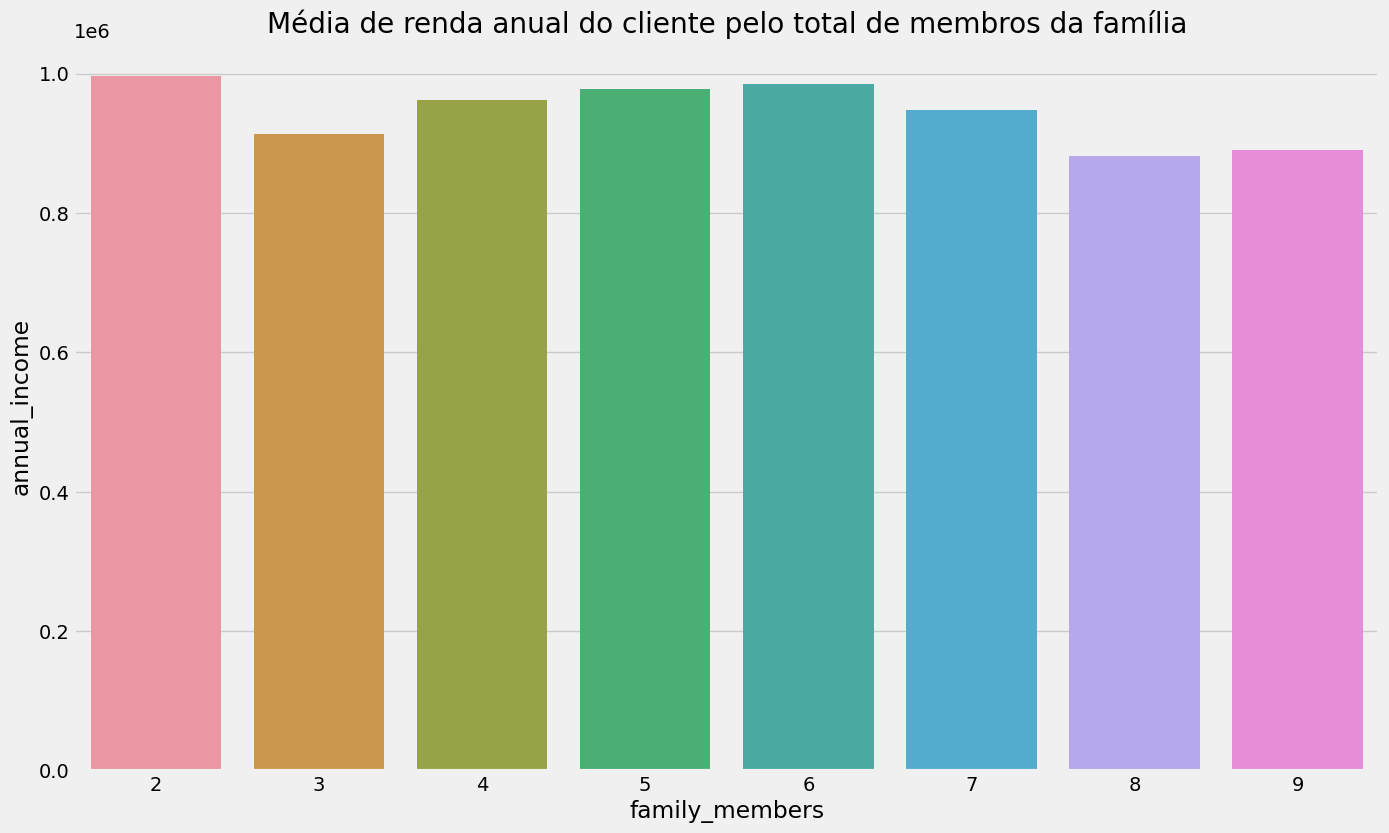

In [437]:
df2 = train_df.groupby('family_members').mean().reset_index()
plt.figure(figsize=(15, 9))
sns.barplot(data = df2, x = 'family_members', y = 'annual_income')
plt.title('Média de renda anual do cliente pelo total de membros da família')

Como podemos ver, não da para criar uma afirmação clara sobre o assunto, o ponto mais notável é que com 8 e 9 membros, a renda média anual é mais baixa mas não da para afirmar que é por causa da quantidade de membros já que com 3 membros é uma média muito próxima.

# 5. Pré Processamento dos dados

In [438]:
train_df['graduate_or_not'] = train_df['graduate_or_not'].map({"Yes": 1, "No": 0})
train_df['frequent_flyer'] = train_df['frequent_flyer'].map({"Yes": 1, "No": 0})
train_df['ever_travelled_abroad'] = train_df['ever_travelled_abroad'].map({"Yes": 1, "No": 0})
train_df['employment_type'] = train_df['employment_type'].map({"Government Sector": 1, "Private Sector/Self Employed": 0})
test_df['graduate_or_not'] = test_df['graduate_or_not'].map({"Yes": 1, "No": 0})
test_df['frequent_flyer'] = test_df['frequent_flyer'].map({"Yes": 1, "No": 0})
test_df['ever_travelled_abroad'] = test_df['ever_travelled_abroad'].map({"Yes": 1, "No": 0})
test_df['employment_type'] = test_df['employment_type'].map({"Government Sector": 1, "Private Sector/Self Employed": 0})

In [439]:
from sklearn.model_selection import train_test_split

X = train_df.drop(columns = 'travel_insurance', axis = 1)
y = train_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [440]:
X_train.head()

,age,employment_type,graduate_or_not,annual_income,family_members,chronic_diseases,frequent_flyer,ever_travelled_abroad
556,33,0,1,550000,4,1,0,0
333,31,0,1,1400000,6,1,0,1
159,27,1,1,900000,7,1,0,0
193,34,0,0,1300000,5,1,0,0
102,29,0,1,500000,3,1,0,0


# 6. Aplicação dos modelos

In [441]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [442]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.7485380116959064


<Axes: >

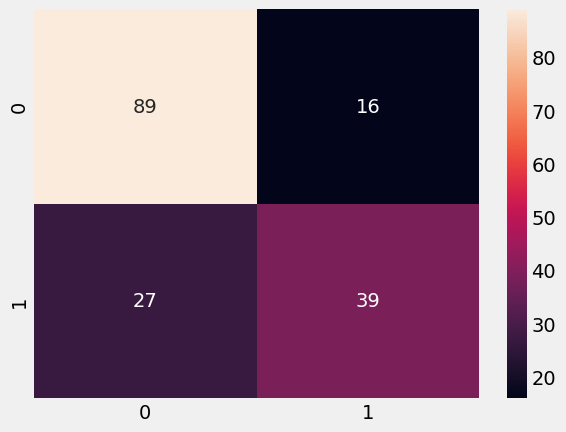

In [443]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [444]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       105
           1       0.71      0.59      0.64        66

    accuracy                           0.75       171
   macro avg       0.74      0.72      0.73       171
weighted avg       0.74      0.75      0.74       171



In [445]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

y_pred = naive_bayes.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.6842105263157895


<Axes: >

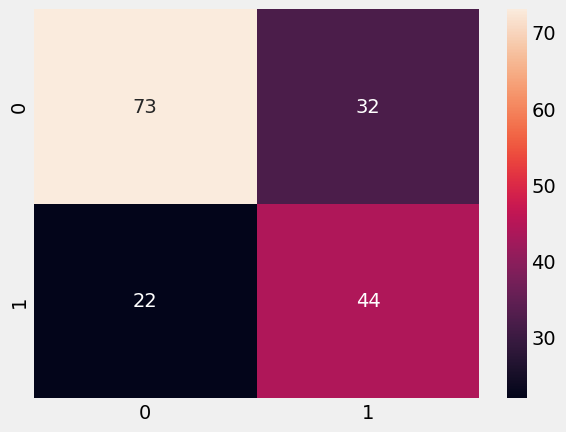

In [446]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [447]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.70      0.73       105
           1       0.58      0.67      0.62        66

    accuracy                           0.68       171
   macro avg       0.67      0.68      0.67       171
weighted avg       0.70      0.68      0.69       171



In [448]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()

logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.6140350877192983


<Axes: >

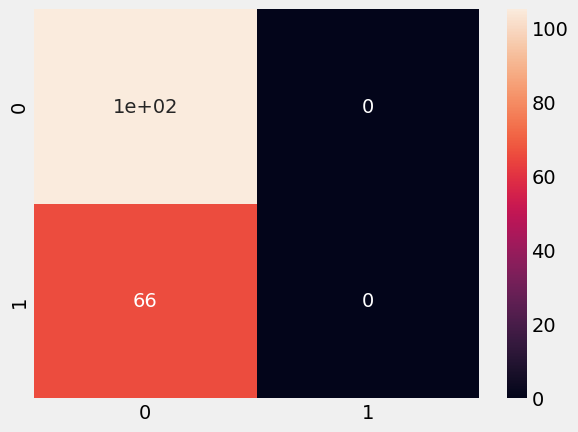

In [449]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [450]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       105
           1       0.00      0.00      0.00        66

    accuracy                           0.61       171
   macro avg       0.31      0.50      0.38       171
weighted avg       0.38      0.61      0.47       171



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [451]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7719298245614035


<Axes: >

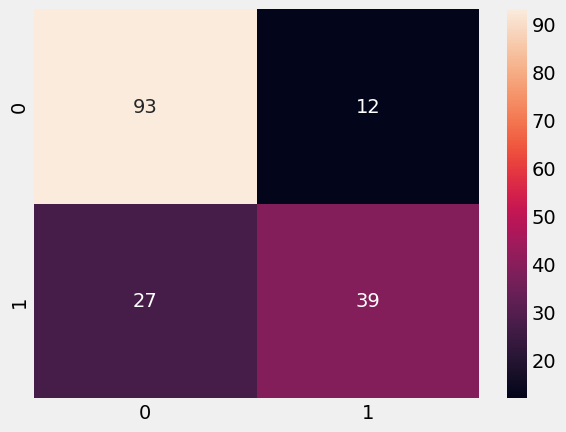

In [452]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [453]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       105
           1       0.76      0.59      0.67        66

    accuracy                           0.77       171
   macro avg       0.77      0.74      0.75       171
weighted avg       0.77      0.77      0.76       171



In [454]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7777777777777778


<Axes: >

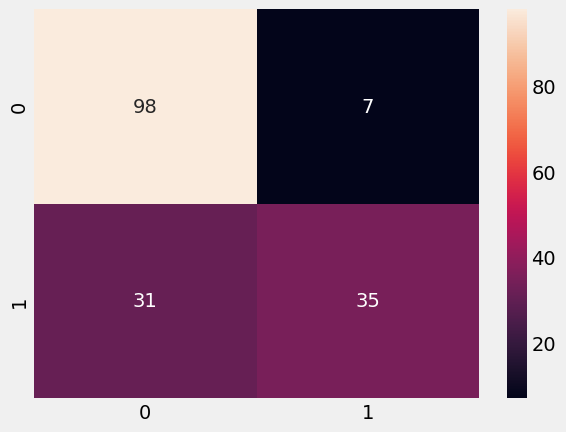

In [455]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [456]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84       105
           1       0.83      0.53      0.65        66

    accuracy                           0.78       171
   macro avg       0.80      0.73      0.74       171
weighted avg       0.79      0.78      0.76       171



# 7. Utilizando o melhor modelo para gerar predições na base que queremos identificar clientes para adquirir o seguro

In [457]:
y_pred_test = knn.predict(test_df)

In [458]:
y_pred_test

array([0, 1, 1, ..., 0, 1, 0])

In [459]:
travel_insurance = pd.DataFrame({
    'travel_insurance': y_pred_test
})

In [460]:
travel_insurance

,travel_insurance
0,0
1,1
2,1
3,0
4,0
...,...
1298,1
1299,0
1300,0
1301,1


Gerando dataframe com a identificação dos clientes que estão propícios a aceitar o seguro.

In [461]:
new_clients_df = test_df.join(travel_insurance)
new_clients_df

,age,employment_type,graduate_or_not,annual_income,family_members,chronic_diseases,frequent_flyer,ever_travelled_abroad,travel_insurance
0,25,0,0,1150000,4,0,0,0,0
1,34,0,1,1500000,4,1,1,1,1
2,33,0,1,1500000,3,0,1,1,1
3,28,0,1,1150000,3,0,0,0,0
4,33,1,1,400000,5,1,0,0,0
...,...,...,...,...,...,...,...,...,...
1298,33,0,1,1500000,4,0,1,1,1
1299,28,0,1,1750000,5,1,0,1,0
1300,28,0,1,1150000,6,1,0,0,0
1301,34,0,1,1000000,6,0,1,1,1


# 8. Conclusão

O melhor modelo que conseguimos utilizar foi o KNN com um precision de 83%, escolhi utilizar essa métrica porque precisamos identificar qual clientes estariam verdadeiramente interessados em adquirir o seguro para poder direcionar ações efetivas para aumentar a chance deles comprarem. O modelo poderia atingir uma melhor acurácia possivelmente usando algum escalonador. 